In [21]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

In [22]:
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
pca = PCA(n_components=100, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

accuracy: 0.96


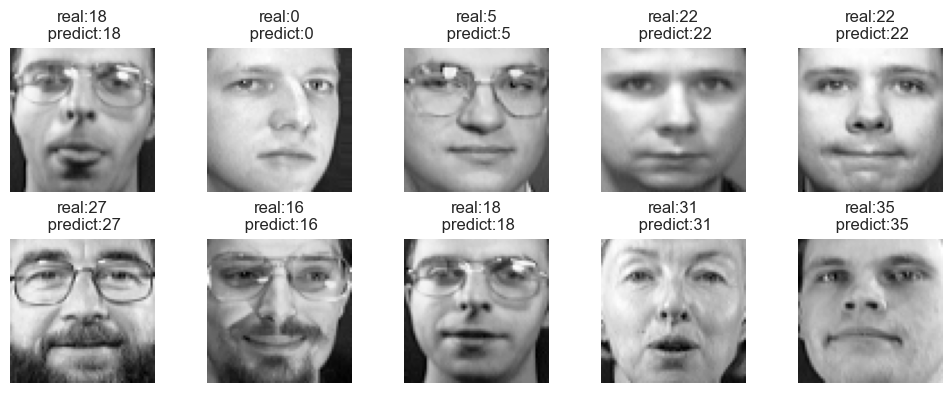

In [24]:
svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm.fit(X_train_pca, y_train)

y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.2f}")

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"real:{y_test[i]}\n predict:{y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [33]:
image = cv2.imread('MKTG-5782-Native-2019-Summit_1020x675.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

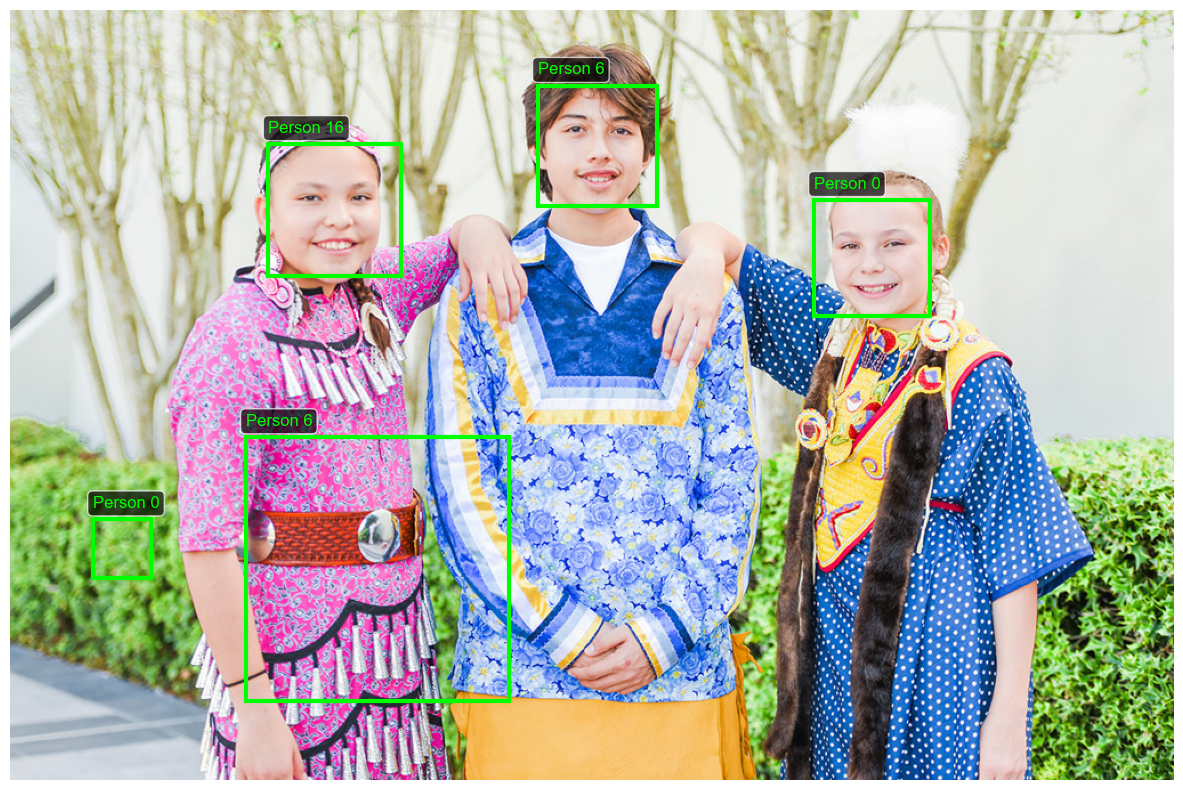

In [34]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image_rgb)

for i, (x, y, w, h) in enumerate(faces):
    face_roi = gray[y:y+h, x:x+w]
    face_resized = cv2.resize(face_roi, (64, 64))
    face_flat = (face_resized.flatten() / 255.0).astype(np.float32)
    face_pca = pca.transform([face_flat])
    predicted_label = svm.predict(face_pca)[0]
    rect = patches.Rectangle((x, y), w, h, linewidth=3, edgecolor='lime', facecolor='none')
    ax.add_patch(rect)
    label_text = f"Person {predicted_label}"
    ax.text(x, y - 10, label_text, color='lime', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.7))



ax.axis('off')
plt.tight_layout()
plt.show()